# **🚀 Data Exploration**

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Load the file, skipping the first THREE rows (indexes 0, 1, 2)
file = 'data/nvidia_2020_2021.csv'
df = pd.read_csv(file, skiprows=3, names=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])

# 2. Convert data types
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
num_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 3. Remove empty rows (just in case)
df = df.dropna(subset=['Date']).reset_index(drop=True)


In [13]:

# 4. Statistical summary and missing values
print("Statistical summary:")
df.describe()


Statistical summary:


,Date,Open,High,Low,Close,Volume
count,505,505.000000,505.000000,505.000000,505.000000,5.050000e+02
mean,2021-01-01 05:53:35.049505024,14.656396,14.910832,14.380337,14.660713,4.203271e+08
min,2020-01-02 00:00:00,4.980000,5.230000,4.500000,4.890000,9.788400e+07
25%,2020-07-02 00:00:00,9.610000,9.710000,9.550000,9.580000,2.625800e+08
50%,2020-12-31 00:00:00,13.380000,13.560000,13.150000,13.350000,3.590880e+08
75%,2021-07-02 00:00:00,19.240000,19.490000,18.860000,19.170000,5.403280e+08
max,2021-12-31 00:00:00,33.450000,34.580000,31.980000,33.310000,1.463684e+09
std,NaN,6.696489,6.821714,6.536820,6.678367,2.124880e+08


In [14]:

print("\nMissing values per column:")
df.isnull().sum()


Missing values per column:


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [15]:
print("\nFirst rows of the DataFrame:")
df.head()


First rows of the DataFrame:


,Date,Open,High,Low,Close,Volume
0,2020-01-02,5.94,5.97,5.89,5.97,237536000
1,2020-01-03,5.85,5.92,5.83,5.88,205384000
2,2020-01-06,5.78,5.91,5.76,5.90,262636000
3,2020-01-07,5.93,6.02,5.88,5.97,314856000
4,2020-01-08,5.97,6.03,5.93,5.98,277108000


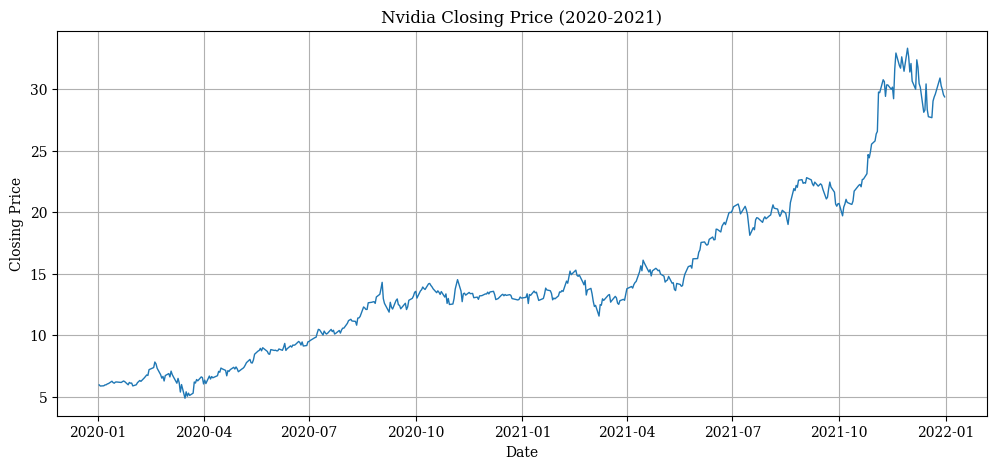

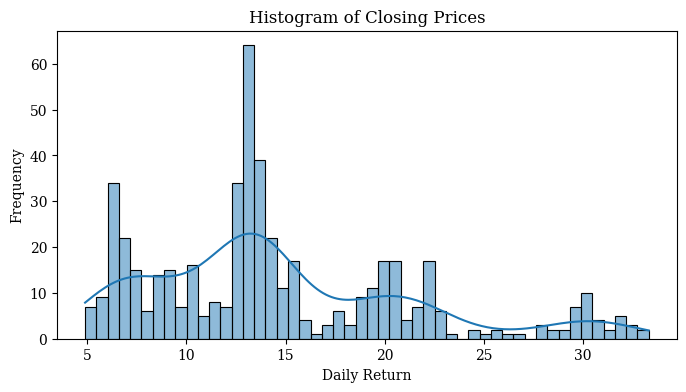

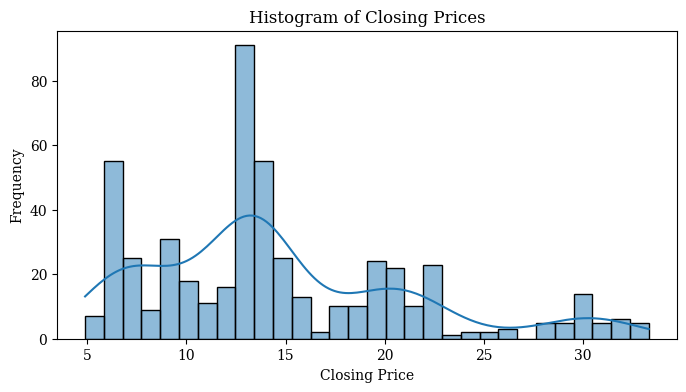

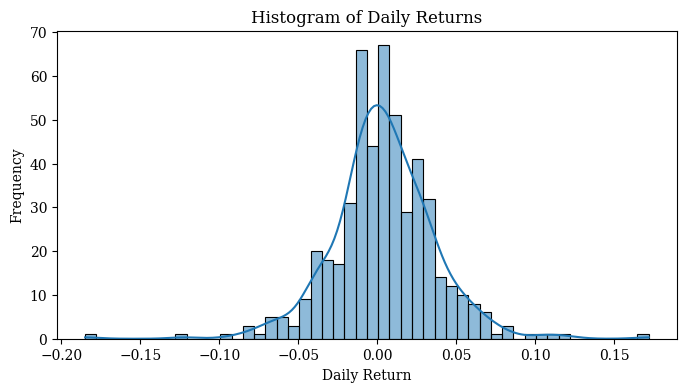

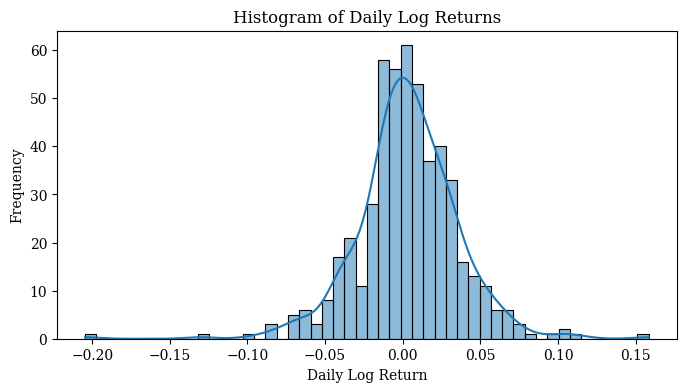

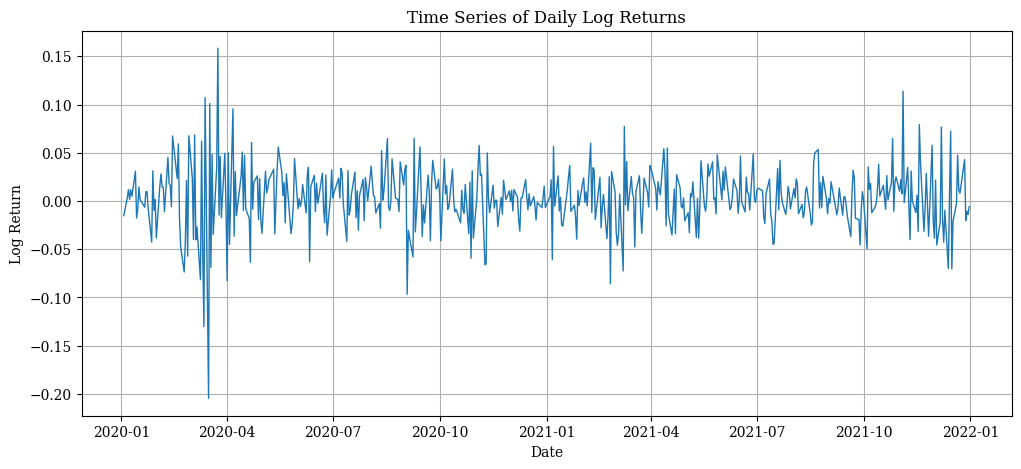

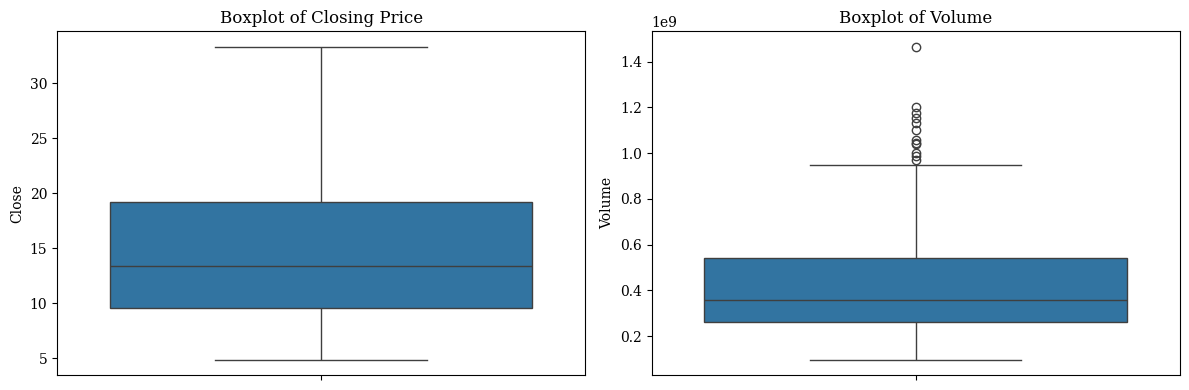

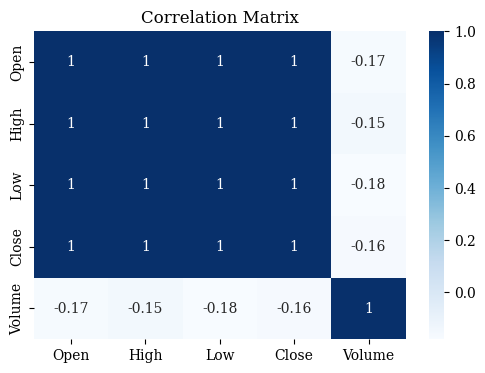

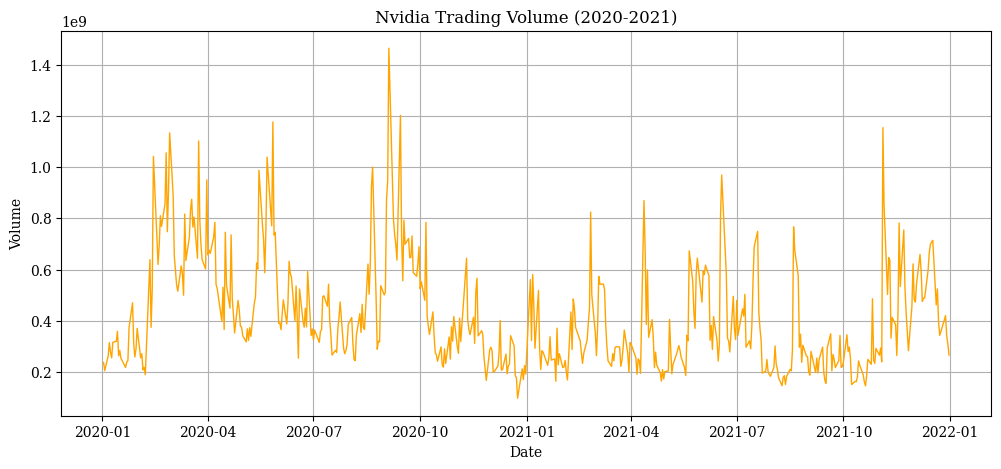

In [ ]:



# 5. Time series plot of closing price
plt.rcParams['font.family'] = 'serif'

plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Close'], linewidth=1)
plt.title('Nvidia Closing Price (2020-2021)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid()
plt.show()

# 5. Histogram Closing Price



plt.figure(figsize=(8,4))
sns.histplot(df['Close'], bins=30, kde=True)
plt.title('Histogram of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()


# 6. Compute and plot simple returns
df['Return'] = df['Close'].pct_change()

plt.figure(figsize=(8,4))
sns.histplot(df['Return'].dropna(), bins=50, kde=True)
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

# 7. Compute and plot log returns
df['LogReturn'] = np.log(df['Close'] / df['Close'].shift(1))

plt.figure(figsize=(8,4))
sns.histplot(df['LogReturn'].dropna(), bins=50, kde=True)
plt.title('Histogram of Daily Log Returns')
plt.xlabel('Daily Log Return')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['LogReturn'],  linewidth=1)
plt.title('Time Series of Daily Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid()
plt.show()

# 8. Boxplots for closing price and volume
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(y=df['Close'])
plt.title('Boxplot of Closing Price')
plt.subplot(1,2,2)
sns.boxplot(y=df['Volume'])
plt.title('Boxplot of Volume')
plt.tight_layout()
plt.show()

# 9. Correlation matrix
corr = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

# 10. Time series plot of trading volume
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Volume'], color='orange', linewidth=1)
plt.title('Nvidia Trading Volume (2020-2021)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid()
plt.show()
